### Mercedes-Benz Greener Manufacturing

In [1]:
import pandas as pd

In [3]:
trainDataF = pd.read_csv("train.csv")
testDataF = pd.read_csv("test.csv")

In [4]:
trainDataF.shape

(4209, 378)

In [5]:
testDataF.shape

(4209, 377)

In [6]:
trainDataF.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
testDataF.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
#Step 1 - Before we check for variance = 0 non-numneric columns should be encoded
#Label encode the non numeric columns
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

columnsToEncode = {"X0", "X1", "X2", "X3", "X4", "X5", "X6","X8"}

for col in columnsToEncode :
    trainDataF[col] = labelEncoder.fit_transform(trainDataF[col])

trainDataF.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Label encode the test data too
for col in columnsToEncode :
    testDataF[col] = labelEncoder.fit_transform(testDataF[col])

testDataF.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
#Safely store the Y column of train set
y_train_data = trainDataF["y"]
print(y_train_data)

trainDataF.drop(["y"], axis=1, inplace=True)

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64


In [11]:
# Concatenate training and test sets
concatenatedDF = pd.concat([trainDataF, testDataF])
concatenatedDF.shape

(8418, 377)

In [12]:
#Step 2 - If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
zeroVarianceColumns = concatenatedDF.columns[concatenatedDF.var()== 0]
zeroVarianceColumns


Index([], dtype='object')

In [13]:
#Step 3 - check for null values
nullConcatDF = concatenatedDF.columns[concatenatedDF.isnull().sum() > 0]
print(nullConcatDF)

Index([], dtype='object')


In [14]:
concatenatedDF.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8418 entries, 0 to 4208
Data columns (total 377 columns):
 #    Column  Non-Null Count  Dtype
---   ------  --------------  -----
 0    ID      8418 non-null   int64
 1    X0      8418 non-null   int32
 2    X1      8418 non-null   int32
 3    X2      8418 non-null   int32
 4    X3      8418 non-null   int32
 5    X4      8418 non-null   int32
 6    X5      8418 non-null   int32
 7    X6      8418 non-null   int32
 8    X8      8418 non-null   int32
 9    X10     8418 non-null   int64
 10   X11     8418 non-null   int64
 11   X12     8418 non-null   int64
 12   X13     8418 non-null   int64
 13   X14     8418 non-null   int64
 14   X15     8418 non-null   int64
 15   X16     8418 non-null   int64
 16   X17     8418 non-null   int64
 17   X18     8418 non-null   int64
 18   X19     8418 non-null   int64
 19   X20     8418 non-null   int64
 20   X21     8418 non-null   int64
 21   X22     8418 non-null   int64
 22   X23     8418 non-null 

In [15]:
#Finding unique value of each column
print("Checking unique values for train set ")

for col in concatenatedDF.columns :
    print("For column " + str(col) + ", unique values are --- ")
    print(concatenatedDF[col].unique()) 

Checking unique values for train set 
For column ID, unique values are --- 
[   0    6    7 ... 8413 8414 8416]
For column X0, unique values are --- 
[32 20 40  9 36 43 31 29 39 35 19 27 44 45  7  8 10 46 37 15 12 42  5  0
 26  6 25 13 24  1 22 14 30 38 21 18 23 41  4 16 34 33 17 11  3 28  2 47
 48]
For column X1, unique values are --- 
[23 21 24  3 19 13 20  1  4  0  6  9 26 11 16 22 17 15 10 25  5  7 14 12
  8 18  2]
For column X2, unique values are --- 
[17 19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42
 22 12  9 28 41 18 40 11 43  6 36 10 30 37  4 32  1 23 35 15 44]
For column X3, unique values are --- 
[0 4 2 5 3 1 6]
For column X4, unique values are --- 
[3 1 2 0]
For column X5, unique values are --- 
[24 28 27 12 11 10 14 13  9  8  5  6  1  2  3  4  7 16 15 18 17 20 21 23
 22 25 26 19  0 31 30 29]
For column X6, unique values are --- 
[ 9 11  3  7  8  0  6  2 10  4  5  1]
For column X8, unique values are --- 
[14 23  4 13 18  0  7 15 12 10  3  8 21  9  1 16

##### Step 4 - Perform dimentionality reduction. For this the steps will be 
##### Step 4a - Divide the train data into x_train_data and x_test_data. Remember to drop ID column. It is not carrying any info 
##### Step 4b - Have y_train_data ready.
##### Step 4c - Perform standard scaler onto x_train_data and transform x_train_data and x_test_data.
##### Step 4d - Perform dimentionality reduction on x_train_data and x_test_data.

In [16]:
#Step 4a - Divide the train data into x_train_data and y_train_output. Remember to drop ID column. It is not carrying any info

x_train_data = concatenatedDF.iloc[:4209]
x_train_data = x_train_data.drop(["ID"], axis=1)

x_test_data = concatenatedDF.iloc[4209:]
x_test_data = x_test_data.drop(["ID"], axis=1)

In [18]:
#Step 4b - Have y_train_output ready
y_train_data

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [19]:
#Step 4c - Perform standard scaler onto x_train_data and transform x_train_data and x_test_data.
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

stdScaler.fit(x_train_data)
scaledTrainData = stdScaler.transform(x_train_data)
scaledTestData = stdScaler.transform(x_test_data)


In [20]:
#Step 4d - Perform dimentionality reduction on x_train_data and x_test_data.
from sklearn.decomposition import PCA

pcaInst = PCA()
scaledPCATrainData = pcaInst.fit_transform(scaledTrainData)


In [21]:
pcaInst2 = PCA()
scaledPCATestData = pcaInst2.fit_transform(scaledTestData)
scaledPCATestData.shape

(4209, 376)

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
# Step 5 create an Dmatrix which is the prefered input for xgboost and then create a XGBoost model.
scaledPCATrainDF = pd.DataFrame(scaledPCATrainData)
scaledPCATrainDF.columns = x_train_data.columns

yTrainOutputDF = pd.DataFrame(y_train_data)
yTrainOutputDF.columns = [["y"]]

xgbDataMatrix = xgb.DMatrix(data=scaledPCATrainDF, label=yTrainOutputDF)
print(xgbDataMatrix)

In [25]:
#Choose empherically proven hyper parameters. Alternativelt GridSearchCV can be used to find the hyper parameter values.
xgbReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [26]:
xgbReg.fit(scaledPCATrainData, y_train_data)

# Step 6 predit the y_test_data
pred_y_test_data = xgbReg.predict(scaledPCATestData)

In [27]:
#Apply k-fold Cross Validation using XGBoost
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [28]:
# test-rmse-mean of the last row will determine the performance of the model
cv_results = xgb.cv(dtrain=xgbDataMatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head(50)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,91.014982,0.041527,91.015536,0.086997
1,82.075739,0.044889,82.076118,0.080335
2,74.042648,0.038388,74.046216,0.088194
3,66.810949,0.037922,66.820246,0.085572
4,60.316348,0.041891,60.332795,0.076670
5,54.479954,0.045309,54.517682,0.082571
6,49.253353,0.042566,49.298098,0.099627
7,44.555733,0.041725,44.616201,0.108211
8,40.343338,0.046375,40.425779,0.112270
9,36.564027,0.054789,36.661706,0.107299


In [29]:
print((cv_results["test-rmse-mean"]).tail(1))

49    9.140402
Name: test-rmse-mean, dtype: float64


In [30]:
# Additional info. Finding the influence of the features on the y_test_data.
xg_reg = xgb.train(params=params, dtrain=xgbDataMatrix, num_boost_round=10)


In [31]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


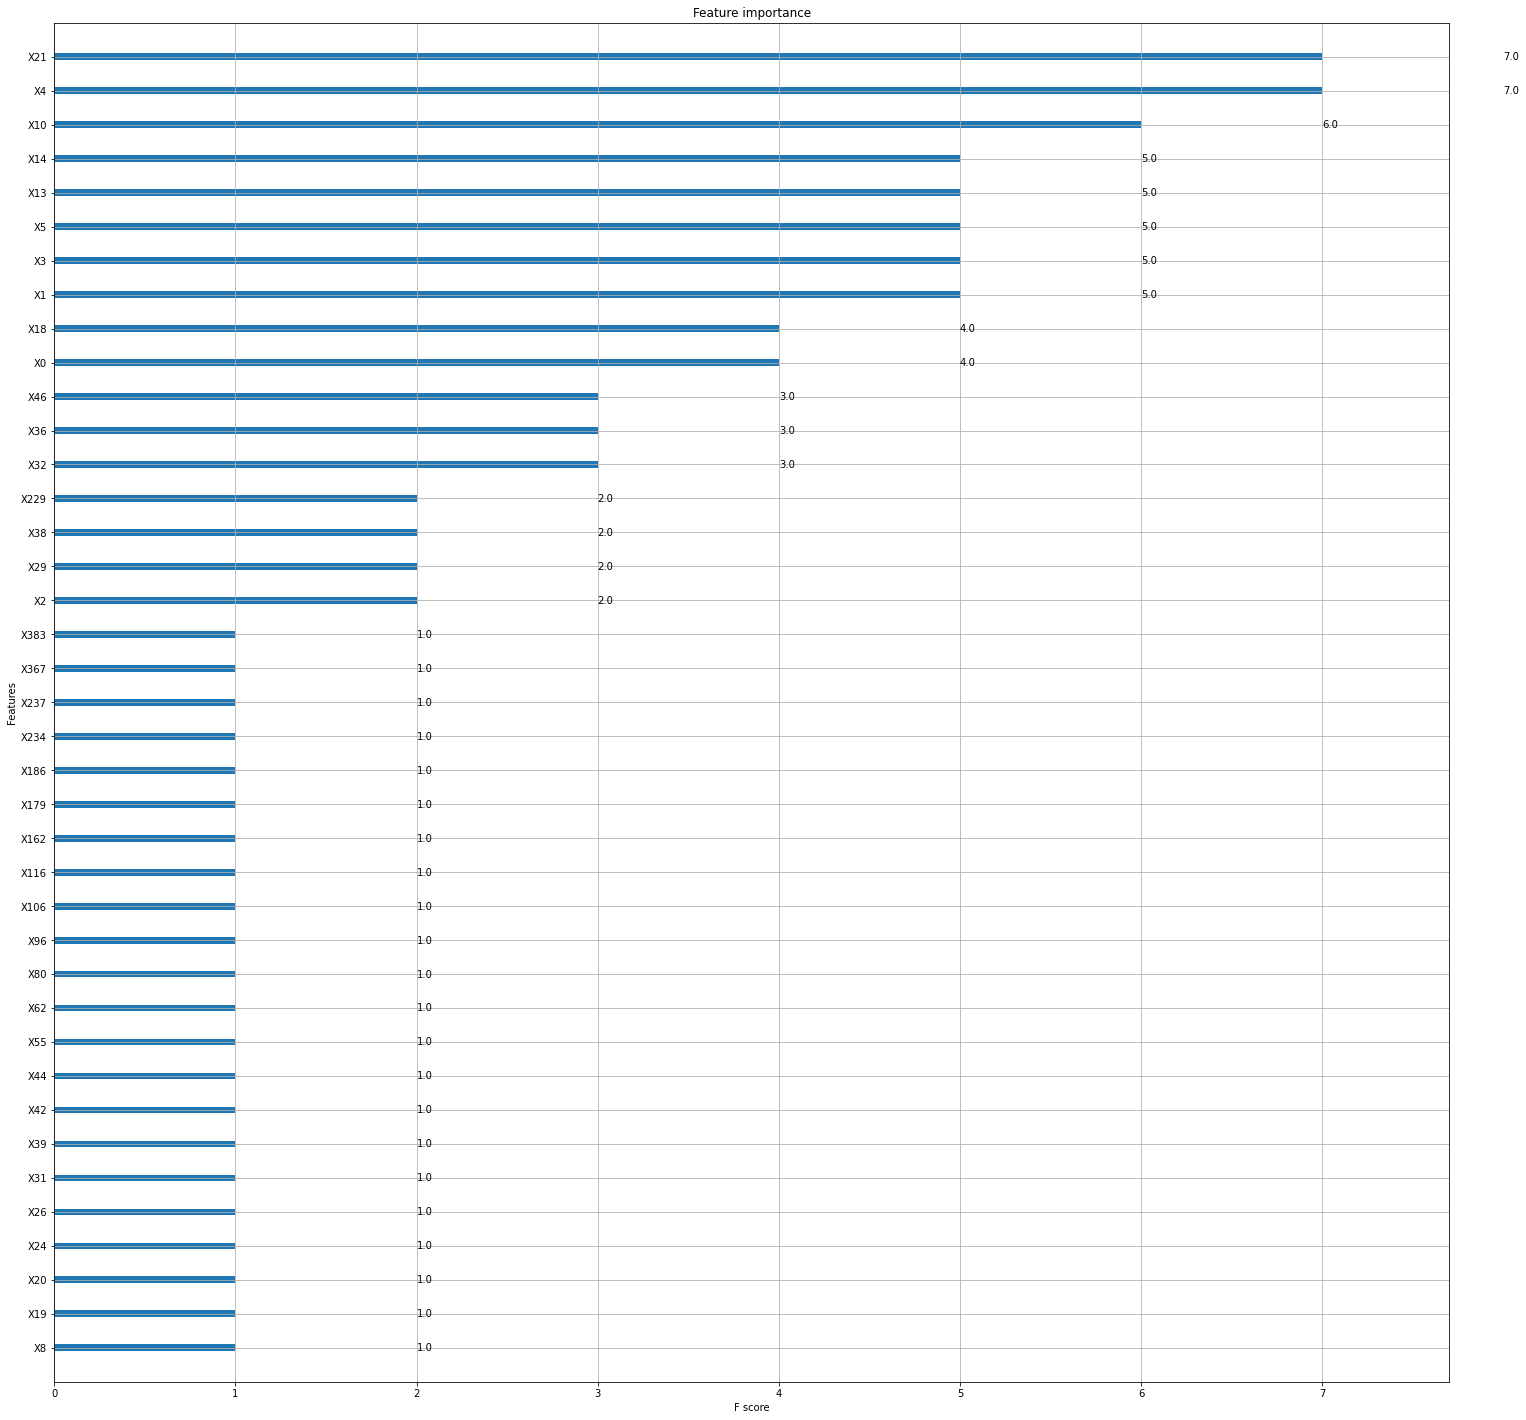

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 25))
xgb.plot_importance(xg_reg, ax=ax)

plt.show()